# Universidad del Valle de Guatemala
## Facultad de Ingeniería
### Departamento de Computación

---

# Laboratorio 1: Análisis Exploratorio, PCA y Apriori - Avances

**Integrantes:**
- Diego Alexander Hernández Silvestre, 21270
- Linda Inés Jiménez Vides, 21169

**Curso:** Data Science  
**Sección:** 10  

---

Guatemala, 18 de julio de 2024


## Carga y Exploración Inicial del Dataset de Factores de Riesgo de Cáncer Cervical

En esta sección, hemos utilizado la librería `ucimlrepo` para cargar y explorar un conjunto de datos del UCI Machine Learning Repository, específicamente el dataset de factores de riesgo de cáncer cervical (ID 383).

### Pasos Realizados:

1. **Importación de la librería**:
    ```python
    from ucimlrepo import fetch_ucirepo
    ```
    Se importó la función `fetch_ucirepo` de la librería `ucimlrepo`.

2. **Descarga del dataset**:
    ```python
    cervical_cancer_risk_factors = fetch_ucirepo(id=383)
    ```
    Se descargó el dataset identificado por el ID 383.

3. **Obtención de datos y etiquetas**:
    ```python
    X = cervical_cancer_risk_factors.data.features 
    y = cervical_cancer_risk_factors.data.targets
    ```
    - `X` contiene las características (features) del dataset como un DataFrame de pandas.
    - `y` contiene las etiquetas (targets) del dataset como un DataFrame de pandas.

4. **Visualización de metadatos**:
    ```python
    print(cervical_cancer_risk_factors.metadata)
    ```
    Se imprimieron los metadatos del dataset, proporcionando una visión general de su contenido y estructura.

5. **Información de las variables**:
    ```python
    print(cervical_cancer_risk_factors.variables)
    ```
    Se imprimió información detallada sobre las variables del dataset, incluyendo el nombre, tipo y descripción de cada una.

Este análisis inicial nos proporciona una comprensión básica del dataset que utilizaremos para realizar el análisis exploratorio y otras técnicas de análisis de datos.


In [14]:
# Importar las librerías necesarias
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pydantic_settings import BaseSettings
from imblearn.combine import SMOTEENN

In [15]:

# fetch dataset 
cervical_cancer_risk_factors = fetch_ucirepo(id=383) 
  
# data (as pandas dataframes) 
X = cervical_cancer_risk_factors.data.features 
y = cervical_cancer_risk_factors.data.targets 
  
# metadata 
print(cervical_cancer_risk_factors.metadata) 
  
# variable information 
print(cervical_cancer_risk_factors.variables) 

{'uci_id': 383, 'name': 'Cervical Cancer (Risk Factors)', 'repository_url': 'https://archive.ics.uci.edu/dataset/383/cervical+cancer+risk+factors', 'data_url': 'https://archive.ics.uci.edu/static/public/383/data.csv', 'abstract': 'This dataset focuses on the prediction of indicators/diagnosis of cervical cancer. The features cover demographic information, habits, and historic medical records.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 858, 'num_features': 36, 'feature_types': ['Integer', 'Real'], 'demographics': ['Age', 'Other'], 'target_col': None, 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2017, 'last_updated': 'Sun Mar 10 2024', 'dataset_doi': '10.24432/C5Z310', 'creators': ['Kelwin Fernandes', 'Jaime Cardoso', 'Jessica Fernandes'], 'intro_paper': {'title': 'Transfer Learning with Partial Observability Applied to Cervical Cancer Screening', 'autho

In [16]:
data = pd.concat([X, y], axis=1)

# 1. Inspección de Datos
print("Primeras filas del dataset:")
print(data.head())
print("\nInformación del dataset:")
print(data.info())
print("\nDescripción estadística:")
print(data.describe())
# Contar la cantidad de filas
num_filas = data.shape[0]
print(f"El dataset tiene {num_filas} filas.")


Primeras filas del dataset:
   Age  Number of sexual partners  First sexual intercourse  \
0   18                        4.0                      15.0   
1   15                        1.0                      14.0   
2   34                        1.0                       NaN   
3   52                        5.0                      16.0   
4   46                        3.0                      21.0   

   Num of pregnancies  Smokes  Smokes (years)  Smokes (packs/year)  \
0                 1.0     0.0             0.0                  0.0   
1                 1.0     0.0             0.0                  0.0   
2                 1.0     0.0             0.0                  0.0   
3                 4.0     1.0            37.0                 37.0   
4                 4.0     0.0             0.0                  0.0   

   Hormonal Contraceptives  Hormonal Contraceptives (years)  IUD  ...  \
0                      0.0                              0.0  0.0  ...   
1                      0.0

In [17]:
# 2. Limpieza de Datos
# Revisar valores nulos
print("\nValores nulos por columna:")
print(data.isnull().sum())

# Si hay valores nulos, se pueden manejar de diferentes maneras
# Por ejemplo, llenar con la media:
# data = data.fillna(data.mean())


Valores nulos por columna:
Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:H

In [18]:
data['Smokes'].fillna(0, inplace=True)  # Imputar como 0
data['Smokes (years)'].fillna(0, inplace=True)  # Imputar como 0
data['Smokes (packs/year)'].fillna(0, inplace=True)  # Imputar como 0
data['Hormonal Contraceptives'].fillna(0, inplace=True)  # Imputar como 0
data['Hormonal Contraceptives (years)'].fillna(0, inplace=True)  # Imputar como 0
data['IUD'].fillna(0, inplace=True)  # Imputar como 0
data['IUD (years)'].fillna(0, inplace=True)  # Imputar como 0
data['STDs'].fillna(0, inplace=True)  # Imputar como 0
data['STDs (number)'].fillna(0, inplace=True)  # Imputar como 0
data['STDs:condylomatosis'].fillna(0, inplace=True)  # Imputar como 0
data['STDs:cervical condylomatosis'].fillna(0, inplace=True)  # Imputar como 0
data['STDs:vaginal condylomatosis'].fillna(0, inplace=True)  # Imputar como 0
data['STDs:vulvo-perineal condylomatosis'].fillna(0, inplace=True)  # Imputar como 0
data['STDs:syphilis'].fillna(0, inplace=True)  # Imputar como 0
data['STDs:pelvic inflammatory disease'].fillna(0, inplace=True)  # Imputar como 0
data['STDs:genital herpes'].fillna(0, inplace=True)  # Imputar como 0
data['STDs:molluscum contagiosum'].fillna(0, inplace=True)  # Imputar como 0
data['STDs:AIDS'].fillna(0, inplace=True)  # Imputar como 0
data['STDs:HIV'].fillna(0, inplace=True)  # Imputar como 0
data['STDs:Hepatitis B'].fillna(0, inplace=True)  # Imputar como 0
data['STDs:HPV'].fillna(0, inplace=True)  # Imputar como 0

C:\Users\daher\AppData\Local\Temp\ipykernel_23684\504980816.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Smokes'].fillna(0, inplace=True)  # Imputar como 0
C:\Users\daher\AppData\Local\Temp\ipykernel_23684\504980816.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

In [19]:
def drop_columns_if_exist(data, columns):
    """
    Elimina las columnas especificadas del DataFrame si existen.
    
    :param data: DataFrame del que se eliminarán las columnas.
    :param columns: Lista de nombres de columnas a eliminar.
    """
    for column in columns:
        if column in data.columns:
            data.drop(columns=[column], inplace=True)
            print(f"Columna '{column}' eliminada.")
        else:
            print(f"Columna '{column}' no encontrada en el dataset.")

# Lista de columnas a eliminar
columns_to_drop = ['STDs: Time since first diagnosis', 'STDs: Time since last diagnosis']

# Llamar a la función
drop_columns_if_exist(data, columns_to_drop)

# Verificar las columnas restantes
print("Columnas restantes en el dataset:")
print(data.columns)


Columna 'STDs: Time since first diagnosis' eliminada.
Columna 'STDs: Time since last diagnosis' eliminada.
Columnas restantes en el dataset:
Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')


In [20]:
print("\nValores nulos por columna:")
print(data.isnull().sum())


Valores nulos por columna:
Age                                    0
Number of sexual partners             26
First sexual intercourse               7
Num of pregnancies                    56
Smokes                                 0
Smokes (years)                         0
Smokes (packs/year)                    0
Hormonal Contraceptives                0
Hormonal Contraceptives (years)        0
IUD                                    0
IUD (years)                            0
STDs                                   0
STDs (number)                          0
STDs:condylomatosis                    0
STDs:cervical condylomatosis           0
STDs:vaginal condylomatosis            0
STDs:vulvo-perineal condylomatosis     0
STDs:syphilis                          0
STDs:pelvic inflammatory disease       0
STDs:genital herpes                    0
STDs:molluscum contagiosum             0
STDs:AIDS                              0
STDs:HIV                               0
STDs:Hepatitis B             

In [21]:
data['Number of sexual partners'].fillna(data['Number of sexual partners'].median(), inplace=True)
data['First sexual intercourse'].fillna(data['First sexual intercourse'].median(), inplace=True)
data['Num of pregnancies'].fillna(data['Num of pregnancies'].median(), inplace=True)

C:\Users\daher\AppData\Local\Temp\ipykernel_23684\1013191899.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Number of sexual partners'].fillna(data['Number of sexual partners'].median(), inplace=True)
C:\Users\daher\AppData\Local\Temp\ipykernel_23684\1013191899.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are

In [22]:
print("\nValores nulos por columna:")
print(data.isnull().sum())


Valores nulos por columna:
Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV    

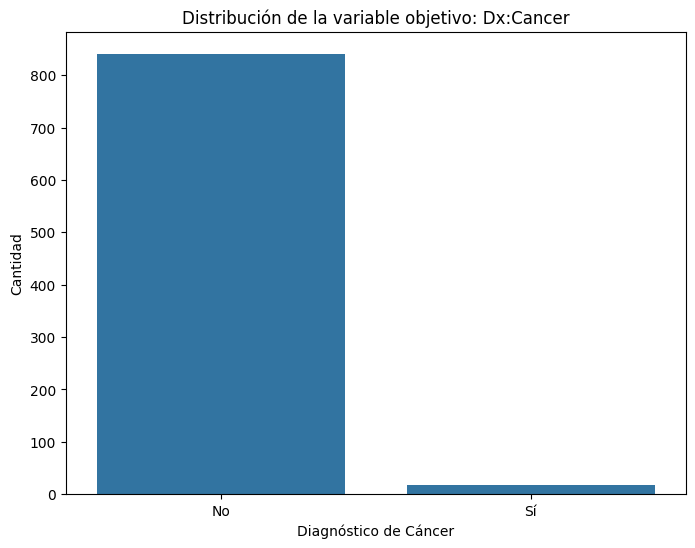

Dx:Cancer
0    0.979021
1    0.020979
Name: proportion, dtype: float64


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribución de la variable objetivo
plt.figure(figsize=(8, 6))
sns.countplot(x='Dx:Cancer', data=data)
plt.title('Distribución de la variable objetivo: Dx:Cancer')
plt.xlabel('Diagnóstico de Cáncer')
plt.ylabel('Cantidad')
plt.xticks([0, 1], ['No', 'Sí'])  # Asumiendo que 0 = No y 1 = Sí
plt.show()

# Imprimir conteos
print(data['Dx:Cancer'].value_counts(normalize=True))  # Proporción de clases


In [24]:
# Supongamos que `data` es tu DataFrame y `y` es la variable objetivo
X = data.drop(columns=['Dx:Cancer'])  # Características
y = data['Dx:Cancer']  # Variable objetivo

# Combinar Oversampling y Undersampling
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X, y)

# Crear un nuevo DataFrame balanceado
data = pd.DataFrame(X_resampled, columns=X.columns)
data['Dx:Cancer'] = y_resampled

# Verificar la distribución
print(data['Dx:Cancer'].value_counts(normalize=True))


Dx:Cancer
1    0.526882
0    0.473118
Name: proportion, dtype: float64



Distribución de la variable objetivo:
Dx:Cancer
1    833
0    748
Name: count, dtype: int64


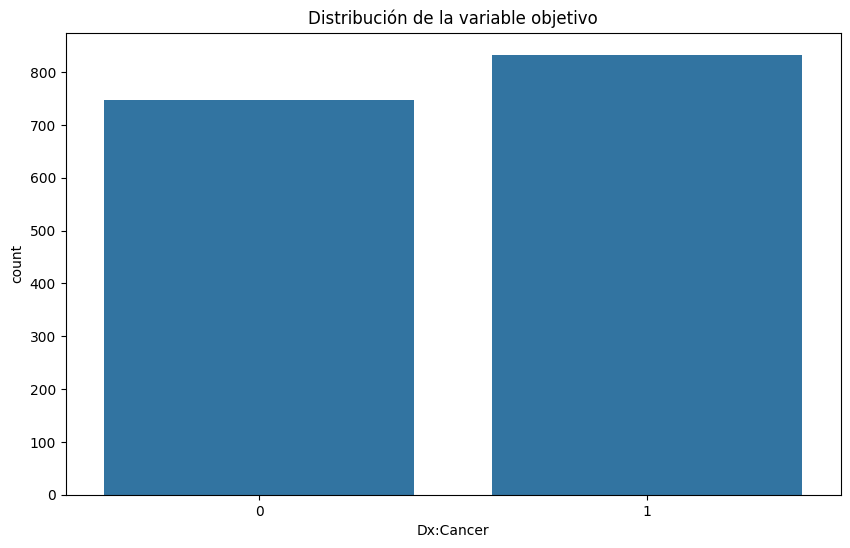

In [25]:

# 3. Análisis Univariado
print("\nDistribución de la variable objetivo:")
print(data['Dx:Cancer'].value_counts())

plt.figure(figsize=(10, 6))
sns.countplot(x='Dx:Cancer', data=data)
plt.title('Distribución de la variable objetivo')
plt.show()

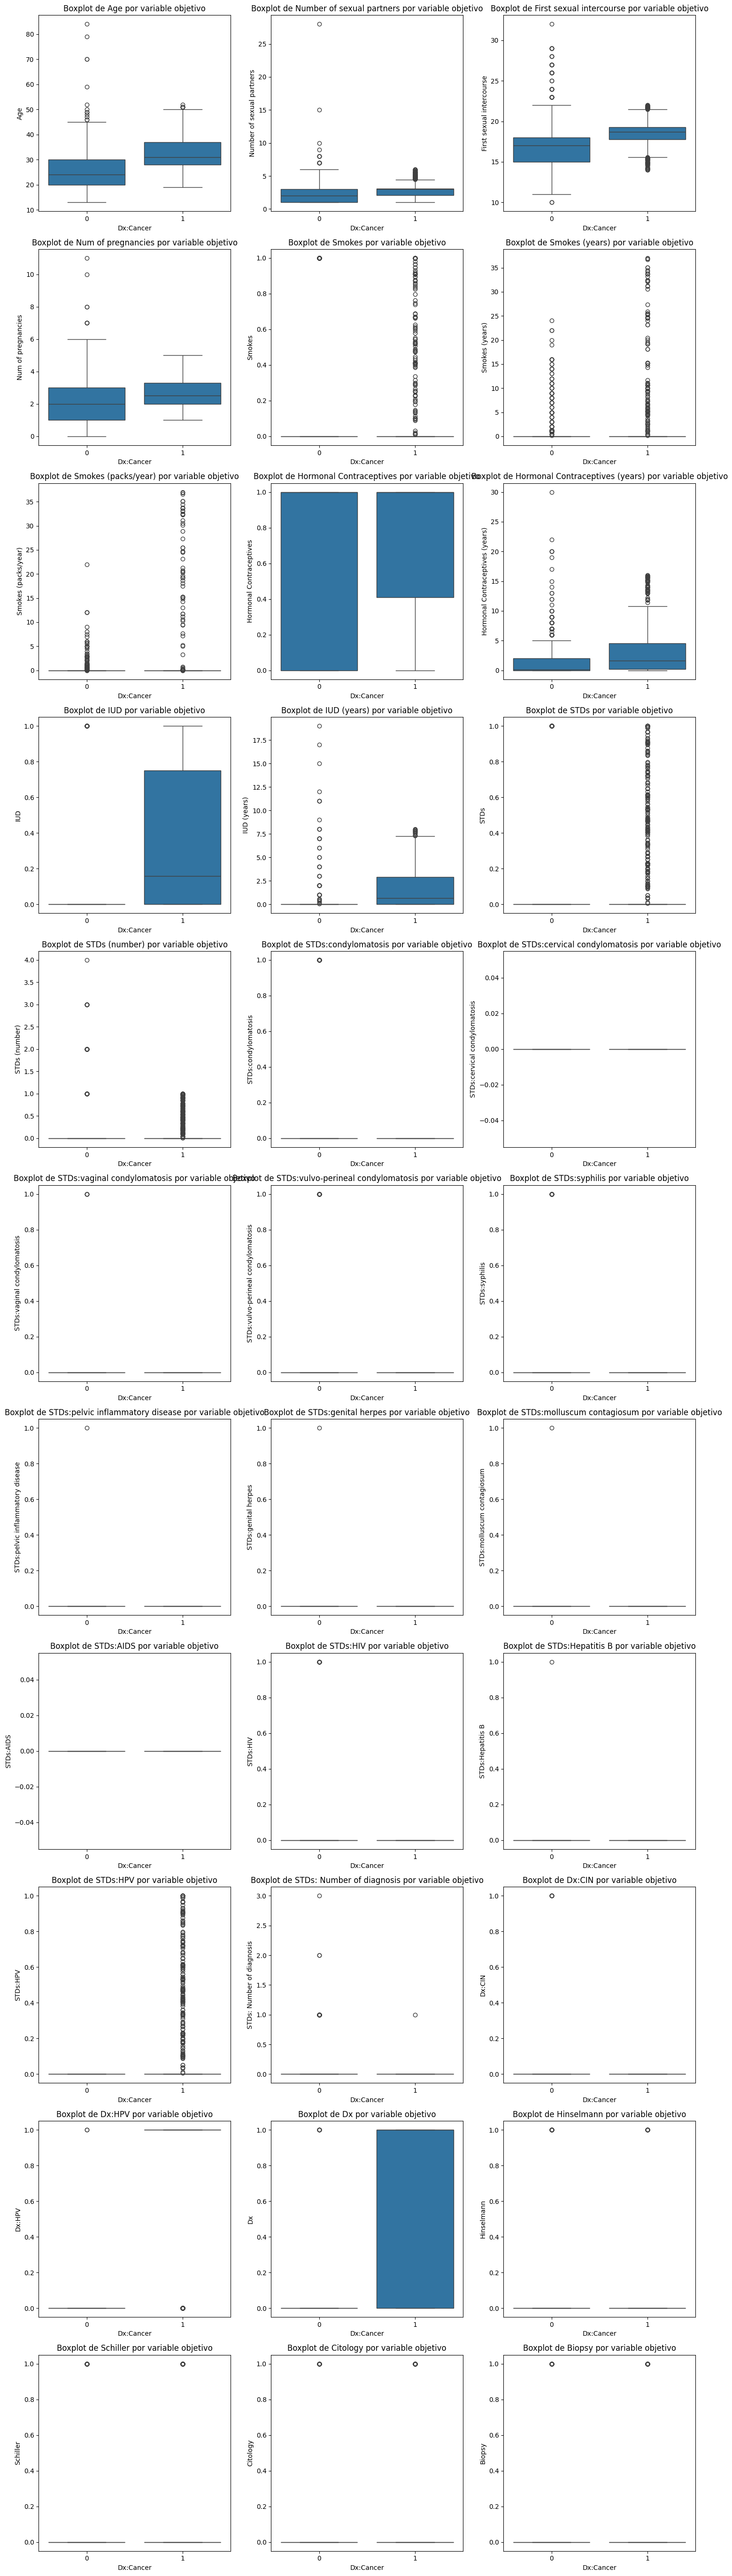

In [42]:
# 4. Análisis Bivariado - Gráfico de Boxplots en cuadrícula
num_cols = 3  # Número de columnas en el gráfico
num_rows = (len(X.columns) + num_cols - 1) // num_cols  # Cálculo de filas necesarias

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
axes = axes.flatten()  # Aplanar el arreglo de ejes

for i, column in enumerate(X.columns):
    sns.boxplot(x='Dx:Cancer', y=column, data=data, ax=axes[i])
    axes[i].set_title(f'Boxplot de {column} por variable objetivo')

# Eliminar los ejes sobrantes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

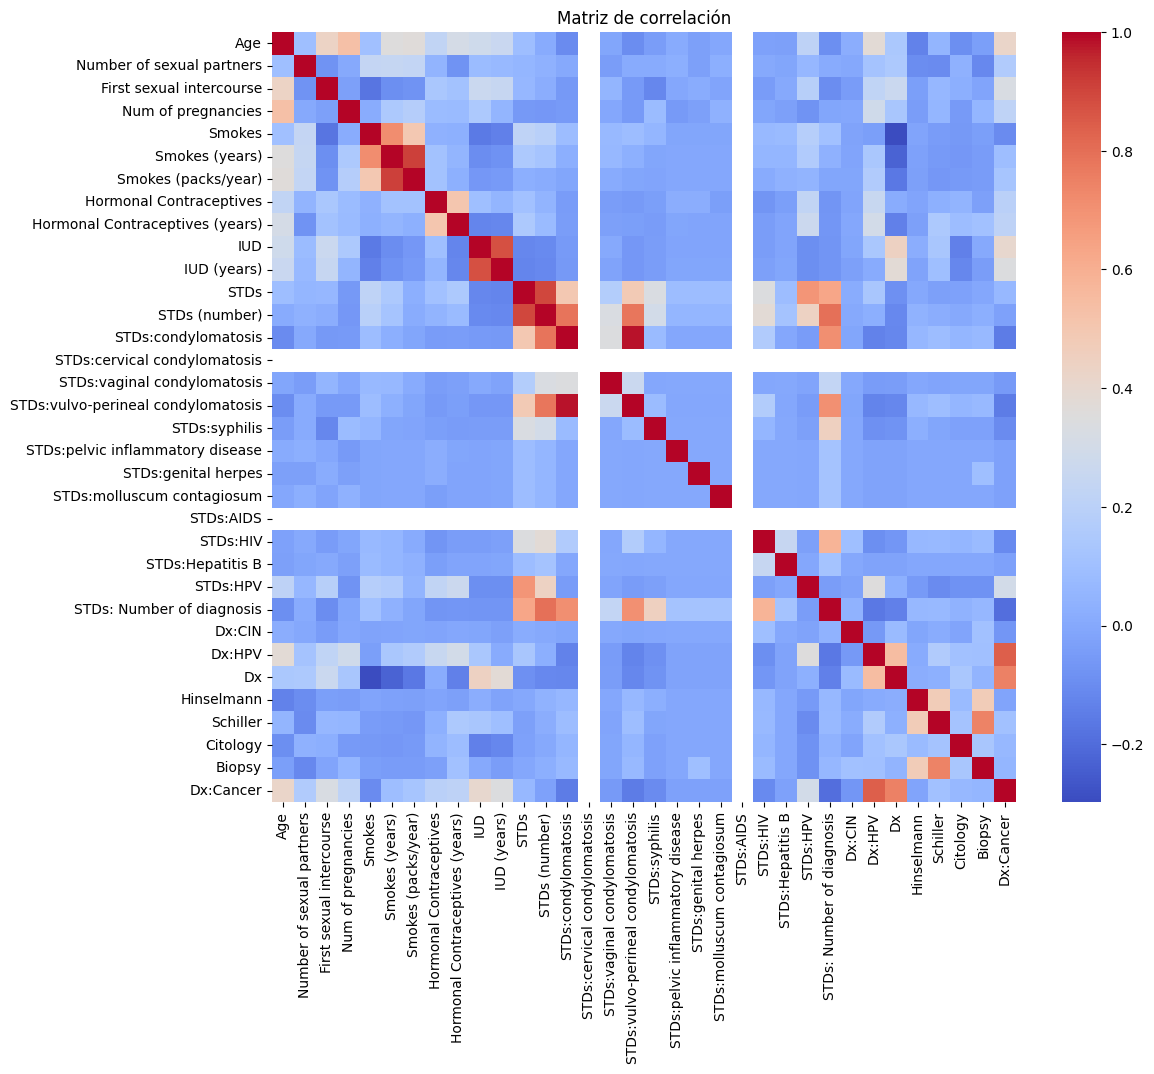

In [27]:
# 6. Análisis de Correlación
plt.figure(figsize=(12, 10))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()